# Lab Week 19: Sliding-window audio analysis

### 21 March 2017

# Goals #

After doing this lab, you should be able to:
* Reason about what RMS and spectral centroid are telling you about an audio signal
* Implement a sliding-window feature extraction to analyse how sound is changing over time

# Part 1: Sliding window analysis using RMS #

In this section, you will see how to use RMS for simple sound volume analysis

## Loading some sound files ##
a. Start by grabbing some sound files 

* http://www.doc.gold.ac.uk/~mas01rf/PMC2014-15/IPython/lab13/song1.wav
* http://www.doc.gold.ac.uk/~mas01rf/PMC2016-17/lab19/loud.wav
* http://www.doc.gold.ac.uk/~mas01rf/PMC2016-17/lab19/soft.wav
* http://www.doc.gold.ac.uk/~mas01rf/PMC2016-17/lab19/saw.wav
* http://www.doc.gold.ac.uk/~mas01rf/PMC2016-17/lab19/sine.wav

The first is a free sound downloaded from
http://freemusicarchive.org/music/Jahzzar/Travellers_Guide/Siesta

The others are modified Garage Band loops (Traffic Jam Guitar, Kyoto Night Guitar), and finally two files I synthesised from scratch.

b. Now load them into variables:

In [4]:
song1 = wavReadMono("Lab19_data/song1.wav")
loud = wavReadMono("Lab19_data/loud.wav")
soft = wavReadMono("Lab19_data/soft.wav")
sineTone = wavReadMono("Lab19_data/sine.wav")
sawTone = wavReadMono("Lab19_data/saw.wav")
#Listen to them if you'd like:
play(song1)
play(loud)
play(soft)
play(sineTone)
play(sawTone)

As we saw in lecture, RMS stands for "root mean square." To compute the RMS of a signal over some analysis frame, you will:
* Square every sample
* Take the average of these squares
* Take the square root of the average

As a mathematical equation, this looks like:

$$ r = \sqrt{\frac{1}{N}(x_1^2 + x_2^2 + ... + x_N^2)} $$

for any sound with *N* samples.

Use the `sqrt`, `mean`, and `pow` functions in Python to compute the RMS for `loud` (compute a single value over all the samples in the file). Hint: You can do this in one line of code without a for-loop.

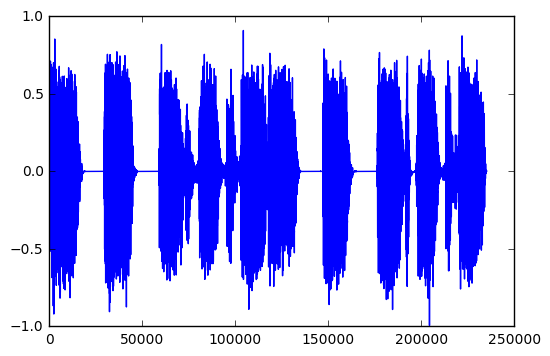

In [2]:
plot(loud)

In [3]:
#RMS: square the samples cell by cell, then sum them up and devide the result by the number of them (average)
loudRMS = sqrt(np.sum(pow(loud,2))/size(loud))
print loudRMS


0.208482089702


Now compute this for all the samples in the `soft` file. Verify that the RMS for this file is indeed lower than for the `loud` file.

In [4]:
softRMS = sqrt(np.sum(pow(soft,2))/size(loud))
print softRMS

0.0941516008858


## Analysing change over time ##

The following code uses a *sliding analysis frame* of 128 samples, and it computes the average of all 128 samples in each frame of some sound file and stores the average in an array. This isn't very useful though. Edit the code so that it computes the RMS in each frame instead.


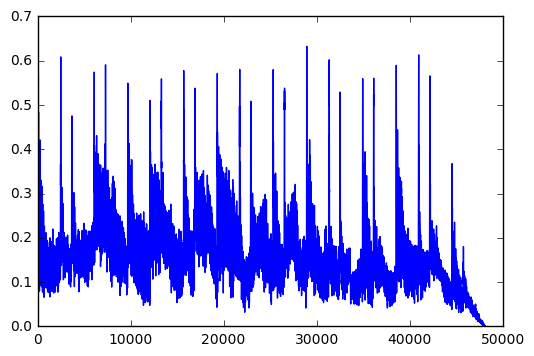

In [5]:
sound = song1 #choose which sound to analyse

win_length = 128 #number of samples in analysis frame
hop_size = 10

# the number of full-length analysis frames

results = [] #empty storage for result
winIndex = 0 #start the analysis at the beginning of the file
while (winIndex<size(sound)) :
    nextFrame = winIndex + hop_size #compute the index of the next frame
    window = sound[winIndex : (winIndex + win_length)] #create the frame's sub-array window
    windowRMS = sqrt(np.sum(pow(window, 2))/size(window)) #calculate its RMS
    results = concatenate([results, [windowRMS]]) #keep adding results together into an array
    winIndex = nextFrame #update index

plot(results)
play(sound)

Once you have this function implemented correctly, examine the RMS of the loud and soft sounds over time, as well as the RMS of song1 over time. Use the space below to explore at least one of the following questions, then write a few sentences about what you did.

(see code blocks below to check out my experiments with RMS)

* Can the RMS help you identify louder and softer parts in a file? e.g., can you detect when the sound is silent? Can you detect louder versus softer notes?

    * It is possible to identify louder and softer parts and, in the snippets of sounds I've examined, it was pretty clear when new "hits" or staccato notes would have their onsets
    

* How useful is the RMS for showing you where notes begin? Are there some notes whose beginnings ("onsets") are easier or harder to see using RMS? Are there certain instruments whose onsets are easier to spot using RMS?

    * Pretty useful, although I wonder about precision if the file was heavily compressed to squash volume peaks. Furthermore, from the files I've inspected, I could see that quick, hit-like or plucked-like onsets are easier to detect than gliding/fading one. Plucked instruments, drums, piano-like instruments and all those instruments whose attacks are pretty sharp and loud would be good ones to analyse using RMS. Instruments whose attacks are slower such as bowed instruments or pad-generating synths would be harder to detect, especially if played softly using legato and/or if several instruments are playing together.
    
    
* If you tried to implement a search system that ranked all the audio files on your computer based on the closeness of their RMS value to a query file, would this be useful for anything? If so, what? 

    * It would help sort tracks based on average loudness. I think that there would be a fair digree of accuracy in grouping compressed as well as loud and "sonically busy" songs at one end and the chart and quiet, ambient, spacious traks filled with silences at the other. The main problem I see though is that RMS is an average value, so a track with bursts of aggressive, loud and noisy music would score very similar to a moderately loud rich and continuous ambite track that was filled with droning sounds and little or no silence. I would personally use RMS together with an index of how often and how much the track changes in loudness, possibly with a measurement of the highest peak in the track to normalise the values among several tracks. 
    
    
* If you ranked all the frames in a file according to their RMS value, from low to high, would this be useful for anything? if so, what?

     * It would help to see how the loudness of the signal changes over time in the file and what are the median and the standard deviation of the RMS in the file. This would help identify peaks of loudness and also see whether there is any pattern in the way loudness changes over time in the file.


* How else might you use RMS in audio analysis, search, or recommendation?

    * A moving RMS would be useful for compression because it can drive the response of the compression algorithm based on the power of the signal (see wikipedia here: https://en.wikipedia.org/wiki/Root_mean_square on why this is the case) rather than just amplitude peaks (note that compressing by peaks is also very useful and usually compressors give you a choice between RMS or peaks). I have also personally used RMS to compute an equal-power panning ( L / R cross-fading ) algorithm, which gives you the impression of a sound moving in a semi-circular way from L to R rather than in a linear fashion. For these same reasons I would say that RMS can be a good index of how loud a file will be as perceived by our ears -this can help searching, ordering and ultimately recommend files that are similar in perceived loudness. As said before, using RMS together with an index of how many and how wide are the gaps between loud and quiet peaks of a file will also be a good indication of its dynamic range and its degree of compresison.
    
    
    

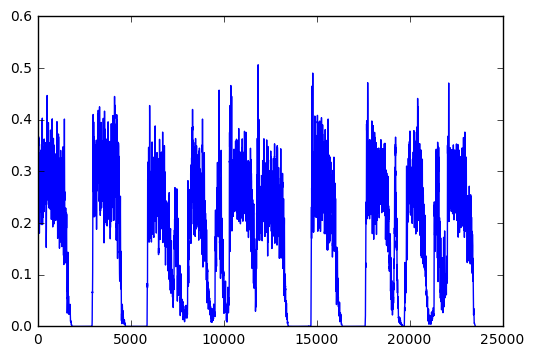

In [13]:
# define a function to calculate a moving RMS
def getRMS(soundAr, winLength = 128, hopSize = 10) :
    sound = soundAr #choose which sound to analyse

    win_length = winLength #number of samples in analysis frame
    hop_size = hopSize

    # the number of full-length analysis frames

    results = [] #empty storage for result
    winIndex = 0 #start the analysis at the beginning of the file
    while (winIndex<size(sound)) :
        nextFrame = winIndex + hop_size
        window = sound[winIndex : (winIndex + win_length)]
        windowRMS = sqrt(np.sum(pow(window, 2))/size(window))
        results = concatenate([results, [windowRMS]])
        winIndex = nextFrame #update index
    return results


# compute moving RMS on "loud"
play(loud)
loudMovingRMS = getRMS(loud, 128, 10)
plot(loudMovingRMS)
    

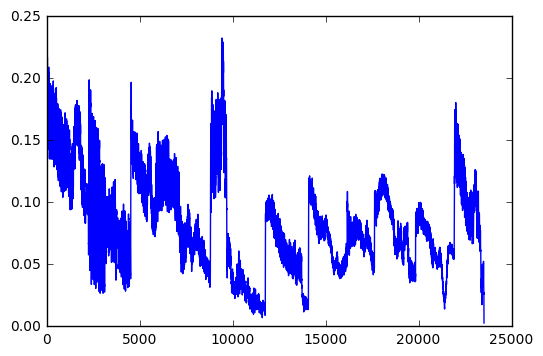

In [7]:
# compute moving RMS on "soft"
play(soft)
softMovingRMS = getRMS(soft)
plot(softMovingRMS)

# Part 2. Sliding window analysis using spectral centroid #

The spectral centroid is another easy to compute audio feature, which tells us something about the spectral content of a sound. It can tell us whether one sound has a "brighter" timbre than another, and it can give us a hint about the instrumentation or mastering process.

The spectral centroid for a frame of audio is computed by taking a weighted average of the FFT magnitude bins (from 0 to the Nyquist rate). Each bin magnitude is weighted by the frequency corresponding to that bin.

In math, this looks like:

$$ c = \frac{\sum_{k=0}^{N/2-1} f_k \lvert X(k)\rvert }{ \sum_{k=0}^{N/2-1} \lvert X(k)\rvert } $$

where $\lvert X(k)\rvert $ is the magnitude of the $k$th FFT bin and $f_k$ is the frequency corresponding to that bin.

The code below computes the spectral centroid for a segment of audio stored in a variable called `sound`. Make sure you understand how this is computing the equation above.


In [8]:
f = abs(fft.fft(sound)[0:size(sound)/2]) #the magnitude spectrum, from 0 to nyquist
freqs = (fft.fftfreq(size(sound), 1/44100))[0:(size(sound)/2)] #the frequency values for each bin, from 0 to nyquist
centroid = sum(freqs * f)/sum(f) # the weighted sum of magnitudes divided by the unweighted sum of magnitudes
print centroid #print it out

2423.36325267


/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [8]:
#Define custom function to get the centroid of a sound
def getCentroid(inSound) : 
    fr = abs(fft.fft(inSound))[0:size(inSound)/2]
    freqz = (fft.fftfreq(size(inSound), 1/44100))[0:size(inSound)/2]
    cen = sum(freqz * fr) / sum(fr)
    print cen

Compute the spectral centroid for loud, soft, sineTone, and sawTone. What do you observe?

In [12]:
print("loud : ")
getCentroid(loud)
print("soft: ")
getCentroid(soft)
print("sineTone : ")
getCentroid(sineTone)
print("sawTone: ")
getCentroid(sawTone)

loud : 
1438.73542823
soft: 
1546.71465491
sineTone : 
445.321308705
sawTone: 
5137.42419117


/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [1]:
#OBSERVATIONS:
# sineTone has the lowest centroid and sawTone the highest
# loud has a slightly lower centroid than soft and they both score about 3 to 4 times more than sineTone and less than a third below sawTone
# the order they are listed is the order I would have given if I was asked how "clean" the sound was (sineTone being the cleanest)


Using the sliding window analysis code for average / RMS above, implement a sliding window analysis for spectral centroid below. Use an analysis frame size of 2048 and a hop size of at least 100.

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


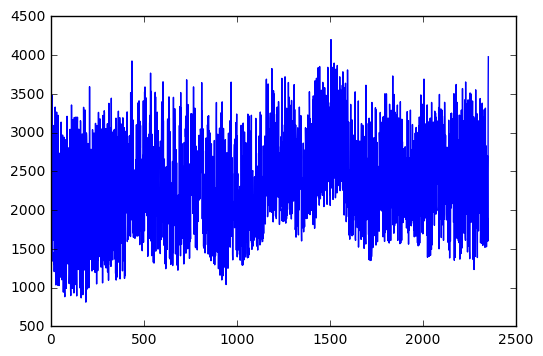

In [26]:
#put your sliding window centroid analysis here

def getMovCentroid(inSound, winLength = 2048, hopSize = 100, sampRate = 44100) :
    results = [] #empty array to store results
    winIndex = 0 #start analysing at the beginning of the file
    while (winIndex<size(inSound)) :
        nextFrame = winIndex + hopSize #prepare index for the next frame of analysis
        window = inSound[winIndex : (winIndex + winLength)] #grab current frame within the file
        
        winSpec = abs(fft.fft(window))[0:size(window)/2] #calculate its spectrum up to the Nyquist
        winFreqs = (fft.fftfreq(size(window), 1/sampRate))[0:size(window)/2] #calculate the frequency value of each bin
        winCentroid = sum(winFreqs * winSpec) / sum(winSpec) #calculate centroid on such frame (weighted sum of magnitudes divided by the unweighted sum of magnitudes)
        
        results = concatenate([results, [winCentroid]]) #add result to the array of results
        winIndex = nextFrame #update index
        
    return results
        

plot(getMovCentroid(soft))


Experiment with applying your function to song1, loud, soft, sawTone, and sineTone. You might want to add samples of your own (e.g., examples of speech, drum tracks, sound effects, ...) Explore at least a few of the following questions, then write a few sentences about what you did and what you found.

* How does the spectral centroid relate to your perception of brightness for the sine tone and saw tone?
* What does the spectral centroid seem to tell you about the music files? e.g., brightness, instrumentation, ...?
* There are 4 places in the loud file where the centroid is very high. What has happened here?
* If you were to rank all frames within a file from low spectral centroid to high centroid, what might this sound like? How might you use this?
* If you were to build a search tool that finds audio files on your computer with a similar spectral centroid to an example file you provide, how might this be useful?

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


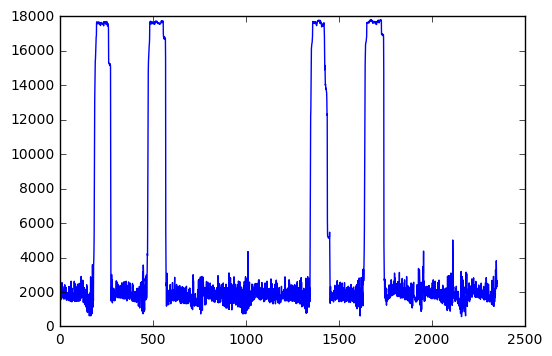

In [21]:
plot(getMovCentroid(loud))

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


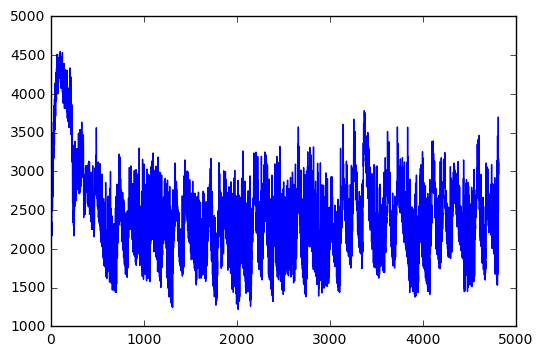

In [22]:
plot(getMovCentroid(song1))

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


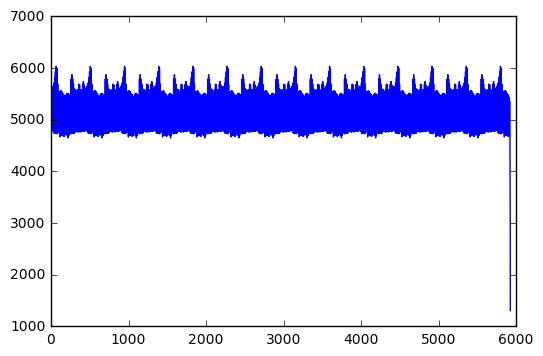

In [43]:
plot(getMovCentroid(sawTone, 128, 10))

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


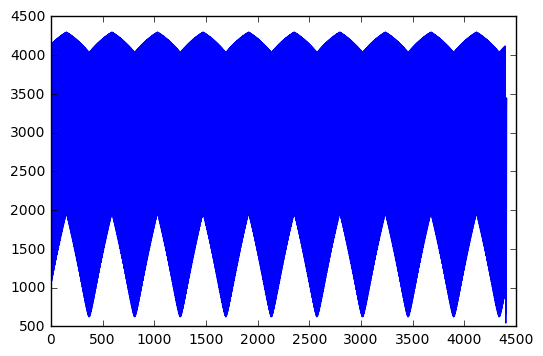

In [45]:
plot(getMovCentroid(sineTone, 128, 10))

In [17]:
play(song1)
play(loud)
play(soft)
play(sineTone)
play(sawTone)

* How does the spectral centroid relate to your perception of brightness for the sine tone and saw tone?
   - The saw tone has a higher spectral  centroid, which makes sense considering that I perceive it as "brighter". Physically I can see that this is happening because it has energy content in frequencies higher than the fundamental (harmonics)
    

* What does the spectral centroid seem to tell you about the music files? e.g., brightness, instrumentation, ...?
    - In song1 is easy to see that the cymbal played at the beginning pushes up the centroid of in that section (brigher sound -- more high frequencies)
    - The brightness of the guitar in loud is less than the brightness in the saw tone and the centroid represents this
    - 
    


* There are 4 places in the loud file where the centroid is very high. What has happened here?
    - These are quiter moments where the guitar is muted. 


*  If you were to rank all frames within a file from low spectral centroid to high centroid, what might this sound like? How might you use this?
    - I see that the biggest changes in spectral centroid are due to different instruments (different timbre) coming in or out, rather than changes in volume or pitch


*  If you were to build a search tool that finds audio files on your computer with a similar spectral centroid to an example file you provide, how might this be useful?
    - It might be useful for grouping tracks that feature similar instrumentation, which can help when users feel like listening to "saxo music" or "electric guitar music"
    


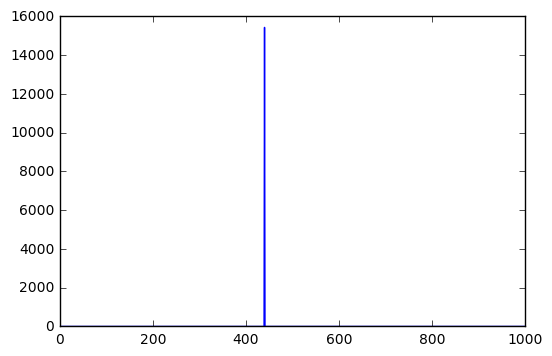

In [31]:
specSin = abs(fft.fft(sineTone))
plot(specSin[0: 1000])

# Part 3: STFT analysis of pitch #

Notice that if you got your spectral centroid sliding window analysis to work, you've just implemented an STFT! (short-time-fourier-transform) Instead of computing the centroid using each FFT frame, why not do something else?

For instance, let's try writing a simple pitch tracker. The simplest way to guess the pitch of a frame might be to take the frequency of the bin with the highest magnitude. In lecture, we talked about how this may often be wrong. But how wrong?

Modify your sliding window analysis to put the frequency of the most prominent current pitch in each element of `results.` (You can test this on sineTone and sawTone, both of which have a pitch of 440Hz.) Try tracking pitch over time for the `soft` file. How well do you think it works?

In [6]:
print max(specSin)
print argmax(specSin)

15434.5701555
440


/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


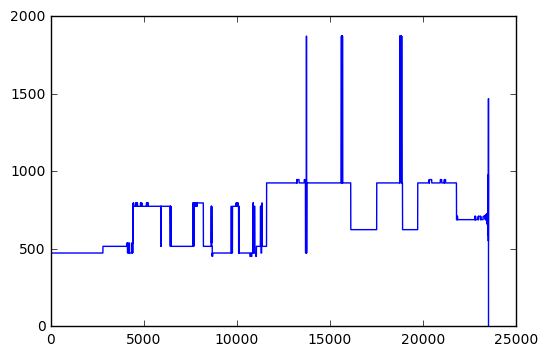

In [44]:
# your work here

def trackPitch(inSound, winLength = 2048, hopSize = 10, sampRate = 44100) :
    results = [] #empty array to store results
    winIndex = 0 #start analysing at the beginning of the file
    while (winIndex<size(inSound)) :
        nextFrame = winIndex + hopSize #prepare index for the next frame of analysis
        window = inSound[winIndex : (winIndex + winLength)] #grab current frame within the file
        
        winSpec = abs(fft.fft(window))[0:size(window)/2] #calculate its spectrum up to the Nyquist
        winFreqs = (fft.fftfreq(size(window), 1/sampRate))[0:size(window)/2] #calculate the frequency value of each bin
        maxBin = argmax(winSpec) #get index of the bin with highest magnitude
        maxFreq = winFreqs[maxBin] #get frequency of the bin
        
        results = concatenate([results, [maxFreq]]) #add result to the array of results
        winIndex = nextFrame #update index
        
    return results
        

plot(trackPitch(soft))



/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


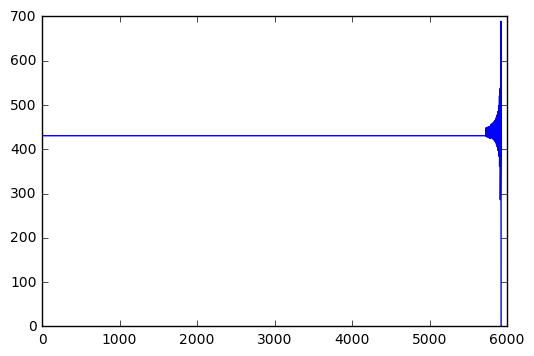

In [45]:
plot(trackPitch(sawTone))

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


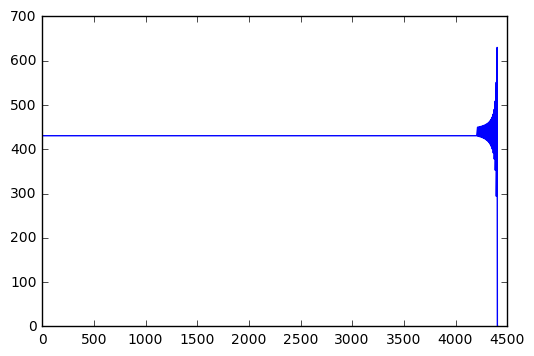

In [46]:
plot(trackPitch(sineTone))

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


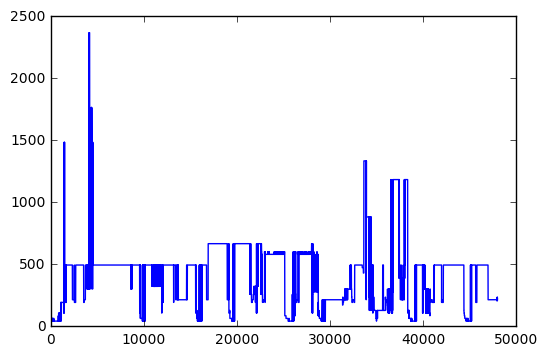

In [56]:
plot(trackPitch(song1)[0:48000])

The simplest way to guess the pitch of a frame might be to take the frequency of the bin with the highest magnitude. In lecture, we talked about how this may often be wrong. But how wrong?

    -Since we perceive pitch as the fundamental frequency, finding the pitch means finding the fundamental frequency. This is not always the frequency where there is the highest amount of energy, especially if the audio is complex and made up of several sounds (such as a pitched intrument and drums playing together), if the fundamental has been filtered out, or if one of the harmonics was enhanced for some reason.
    

Modify your sliding window analysis to put the frequency of the most prominent current pitch in each element of `results.` (You can test this on sineTone and sawTone, both of which have a pitch of 440Hz.) Try tracking pitch over time for the `soft` file. How well do you think it works?

    -It actually works pretty well in this case. There are some unwanted thin peaks and a few "bumps" but overall it seems to be tracking the pitch fairly accurately